In [1]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import coordinate_utils as cu
import vec_transform as vt
import trend_utils as tu

from datetime import datetime
from pathlib import Path
root = Path().cwd()

In [2]:
#Domains
norcal_domain = [-124.65, -117.25, 35.35, 42.5]
synoptic_domain = [-150, -90, 20, 60]

In [3]:
frp = xr.open_mfdataset(str(root/"nc"/"frp"/"frp*.nc"), engine="netcdf4")
norcal_frp = frp.sel(longitude=slice(cu.convert_lon_0_360(norcal_domain[0]),cu.convert_lon_0_360(norcal_domain[1])))
norcal_frp = norcal_frp.sel(latitude=slice(norcal_domain[3],norcal_domain[2]))["frpfire"]
norcal_frp = norcal_frp.sel(valid_time=slice(cu.ts_to_dt('2003-01-02T00'), cu.ts_to_dt('2024-11-10T00')))
norcal_frp_np = norcal_frp.values

norcal_frp

<xarray.DataArray 'frpfire' (valid_time: 7984, latitude: 72, longitude: 74)>
dask.array<getitem, shape=(7984, 72, 74), dtype=float32, chunksize=(41, 72, 46), chunktype=numpy.ndarray>
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2003-01-02 2003-01-03 ... 2024-11-10
  * latitude    (latitude) float64 42.45 42.35 42.25 42.15 ... 35.55 35.45 35.35
  * longitude   (longitude) float64 235.4 235.5 235.6 ... 242.5 242.6 242.7
Attributes: (12/33)
    GRIB_paramId:                             210099
    GRIB_dataType:                            ga
    GRIB_numberOfPoints:                      6480000
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_units:                               W m**-2
    long_name:                                Wildfire radiative power
    units:                                    W m**-2
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0

In [4]:
frpsum = norcal_frp_np.sum(axis=(1,2))

num_fire_days = np.count_nonzero(frpsum == 0)
num_fire_days

737

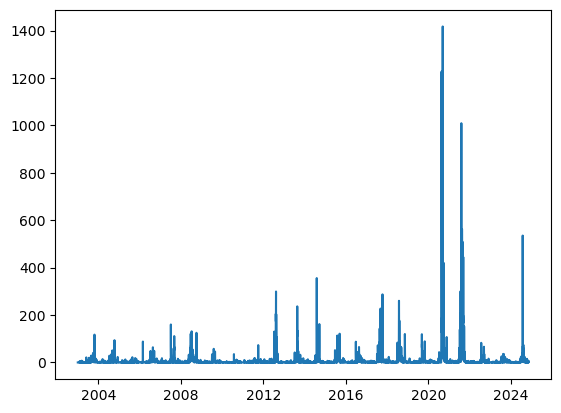

In [5]:
plt.plot(norcal_frp.coords["valid_time"],frpsum)

In [6]:
norcal_frp.sel(valid_time=slice(datetime(year=2003, month=12, day=30),datetime(year=2004, month=1, day=2)))

<xarray.DataArray 'frpfire' (valid_time: 4, latitude: 72, longitude: 74)>
dask.array<getitem, shape=(4, 72, 74), dtype=float32, chunksize=(3, 72, 46), chunktype=numpy.ndarray>
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2003-12-30 2003-12-31 ... 2004-01-02
  * latitude    (latitude) float64 42.45 42.35 42.25 42.15 ... 35.55 35.45 35.35
  * longitude   (longitude) float64 235.4 235.5 235.6 ... 242.5 242.6 242.7
Attributes: (12/33)
    GRIB_paramId:                             210099
    GRIB_dataType:                            ga
    GRIB_numberOfPoints:                      6480000
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_units:                               W m**-2
    long_name:                                Wildfire radiative power
    units:                                    W m**-2
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0

In [7]:
hgt = xr.open_mfdataset(str(root/"nc"/"era5"/"era5h500.nc"), engine="netcdf4").sel(valid_time=norcal_frp.coords['valid_time'].values)
sfc = xr.open_mfdataset(str(root/"nc"/"era5"/"era5sfc.nc"), engine="netcdf4").sel(valid_time=norcal_frp.coords['valid_time'].values)

In [8]:
hgt

<xarray.Dataset>
Dimensions:         (valid_time: 7984, pressure_level: 1, latitude: 161,
                     longitude: 241)
Coordinates:
    number          int64 ...
  * valid_time      (valid_time) datetime64[ns] 2003-01-02 ... 2024-11-10
  * pressure_level  (pressure_level) float64 500.0
  * latitude        (latitude) float64 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * longitude       (longitude) float64 -150.0 -149.8 -149.5 ... -90.25 -90.0
    expver          (valid_time) object dask.array<chunksize=(7984,), meta=np.ndarray>
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 dask.array<chunksize=(2664, 1, 54, 81), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-24T11:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [9]:
sfc

<xarray.Dataset>
Dimensions:     (valid_time: 7984, latitude: 161, longitude: 241)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2003-01-02 2003-01-03 ... 2024-11-10
  * latitude    (latitude) float64 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 -150.0 -149.8 -149.5 ... -90.5 -90.25 -90.0
    expver      (valid_time) object dask.array<chunksize=(7984,), meta=np.ndarray>
Data variables:
    u10         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    d2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
    msl         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1599, 33, 49), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-25T12:40 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
t2m = sfc['d2m'].values
shape = t2m.shape
shape

(7984, 161, 241)

In [11]:
row_data = t2m.reshape(shape[0], -1)
means = np.mean(row_data, axis=1)
long_term_mean = np.mean(means)

days = np.arange(shape[0])
a, b, c = np.polyfit(days, means - long_term_mean, 2)

trend = a*days**2 + b*days + c

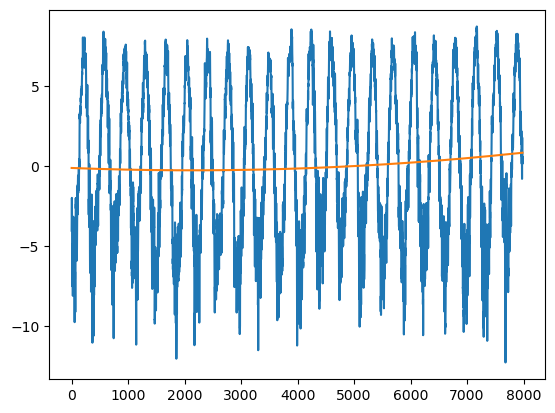

In [12]:
plt.plot(means-long_term_mean)
plt.plot(trend)

In [13]:
pad_width = len(means) // 2
padded_data = np.pad(means, pad_width, mode='wrap')

fft_result = np.fft.fft(padded_data-long_term_mean)
freqs = np.fft.fftfreq(len(padded_data), d=1) #sample spacing is once per day
periods = 1/freqs

C:\Users\ameya\AppData\Local\Temp\ipykernel_26804\1742959209.py:6: RuntimeWarning: divide by zero encountered in divide
  periods = 1/freqs


In [14]:
#construct our filter
center_notch = 365.25
half_bandwidth = 50
period_ranges_pos = np.array([center_notch-half_bandwidth, center_notch+half_bandwidth])
period_ranges_neg = -np.flip(period_ranges_pos)

filter = np.full(shape=freqs.shape, fill_value=True)
filter[(freqs < 1/period_ranges_pos[0]) & (freqs > 1/period_ranges_pos[1])] = False
filter[(freqs < 1/period_ranges_neg[0]) & (freqs > 1/period_ranges_neg[1])] = False

In [15]:
fft_result[~filter] = 0

(-500.0, 500.0)

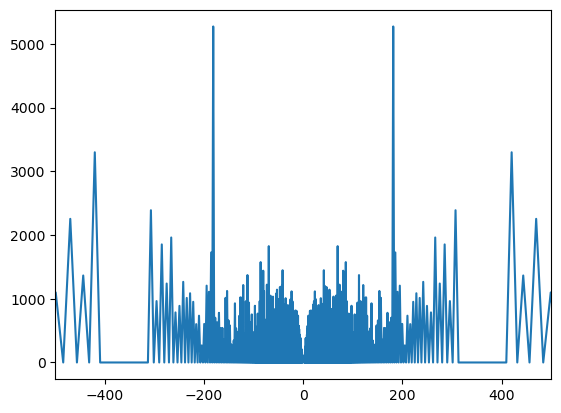

In [16]:
plt.plot(periods, np.abs(fft_result))
plt.xlim([-500, 500])

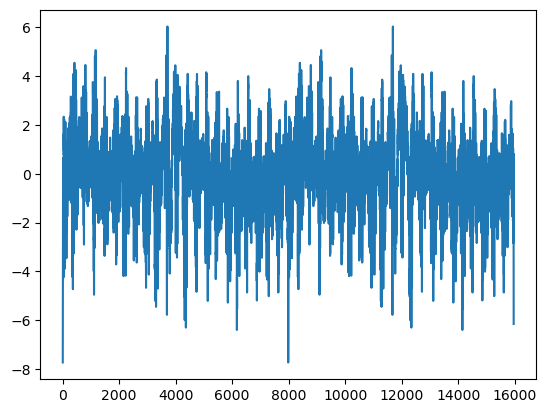

In [17]:
detrended = np.real(np.fft.ifft(fft_result))
plt.plot(detrended)

C:\Users\ameya\AppData\Local\Temp\ipykernel_26804\675520238.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/np.fft.fftfreq(len(detrended), d=1), np.abs(np.fft.fft(detrended)))


(-400.0, 400.0)

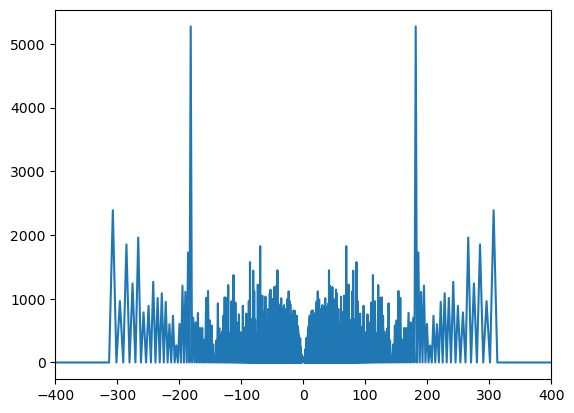

In [18]:
plt.plot(1/np.fft.fftfreq(len(detrended), d=1), np.abs(np.fft.fft(detrended)))
plt.xlim([-400, 400])

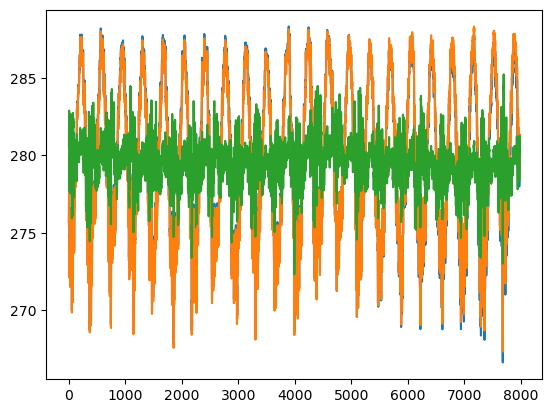

In [19]:
t2m_long_detrend, coeffs = tu.quadratic_detrend(t2m)
t2m_full_detrend, diffs = tu.seasonal_detrend(t2m_long_detrend)
plt.plot(np.mean(t2m_long_detrend, axis=(1,2)))
plt.plot(np.mean(t2m, axis=(1,2)))
plt.plot(np.mean(t2m_full_detrend, axis=(1,2)))

Text(0.5, 1.0, 'Detrending Process for 500hPa Height')

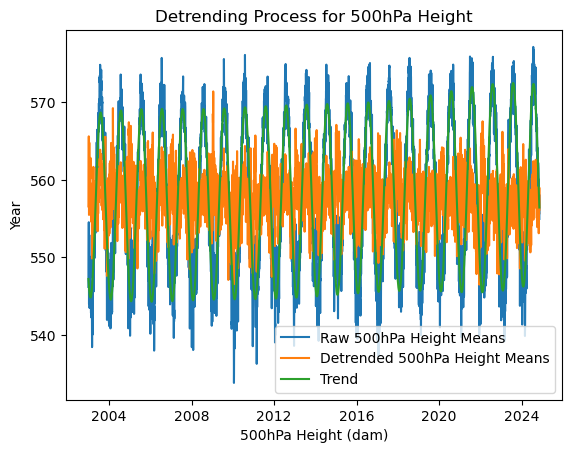

In [28]:
t2m_long_detrend, coeffs = tu.quadratic_detrend(hgt['z'][:,0,:,:].values)
t2m_full_detrend, diffs = tu.seasonal_detrend(t2m_long_detrend)

trend = np.arange(len(hgt.coords['valid_time'].values))
a, b, c = coeffs
trend = a*trend**2 + b*trend + c
trend = (trend+diffs+ np.mean(t2m_full_detrend))/100


plt.plot(hgt.coords['valid_time'].values, np.mean(hgt['z'][:,0,:,:].values, axis=(1,2))/100, label='Raw 500hPa Height Means')
plt.plot(hgt.coords['valid_time'].values, np.mean(t2m_full_detrend, axis=(1,2))/100, label='Detrended 500hPa Height Means')
plt.plot(hgt.coords['valid_time'].values, trend, label="Trend")
plt.legend()
plt.xlabel("500hPa Height (dam)")
plt.ylabel("Year")
plt.title("Detrending Process for 500hPa Height")

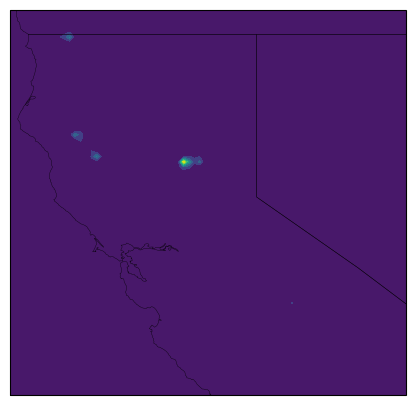

In [21]:
lonlon_frp, latlat_frp = np.meshgrid(norcal_frp.coords['longitude'].values, norcal_frp['latitude'].values)
fig = plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lonlon_frp, latlat_frp, norcal_frp_np[6461], transform=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces', scale='10m'), linewidth=0.25, facecolor='none', edgecolor='black', zorder=2)

In [22]:
np.linspace(.9, .99, 10)

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])